## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.head()


City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

In [3]:
new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']
new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
new_pumpkins.head()

City Name       Package      Variety    Origin Item Size   Color
0  BALTIMORE  24 inch bins          NaN  MARYLAND       lge     NaN
1  BALTIMORE  24 inch bins          NaN  MARYLAND       lge     NaN
2  BALTIMORE  24 inch bins  HOWDEN TYPE  DELAWARE       med  ORANGE
3  BALTIMORE  24 inch bins  HOWDEN TYPE  VIRGINIA       med  ORANGE
4  BALTIMORE  24 inch bins  HOWDEN TYPE  MARYLAND       lge  ORANGE

In [4]:
new_pumpkins.dropna(axis=0, inplace=True)
new_pumpkins.head()

City Name       Package      Variety    Origin Item Size   Color
2  BALTIMORE  24 inch bins  HOWDEN TYPE  DELAWARE       med  ORANGE
3  BALTIMORE  24 inch bins  HOWDEN TYPE  VIRGINIA       med  ORANGE
4  BALTIMORE  24 inch bins  HOWDEN TYPE  MARYLAND       lge  ORANGE
5  BALTIMORE  24 inch bins  HOWDEN TYPE  MARYLAND       lge  ORANGE
6  BALTIMORE  36 inch bins  HOWDEN TYPE  MARYLAND       med  ORANGE

In [5]:
new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)
new_pumpkins.head()

City Name  Package  Variety  Origin  Item Size  Color
2          1        3        4       3          3      0
3          1        3        4      17          3      0
4          1        3        4       5          2      0
5          1        3        4       5          2      0
6          1        4        4       5          3      0

Visualizing the data

In [6]:
import seaborn as sns

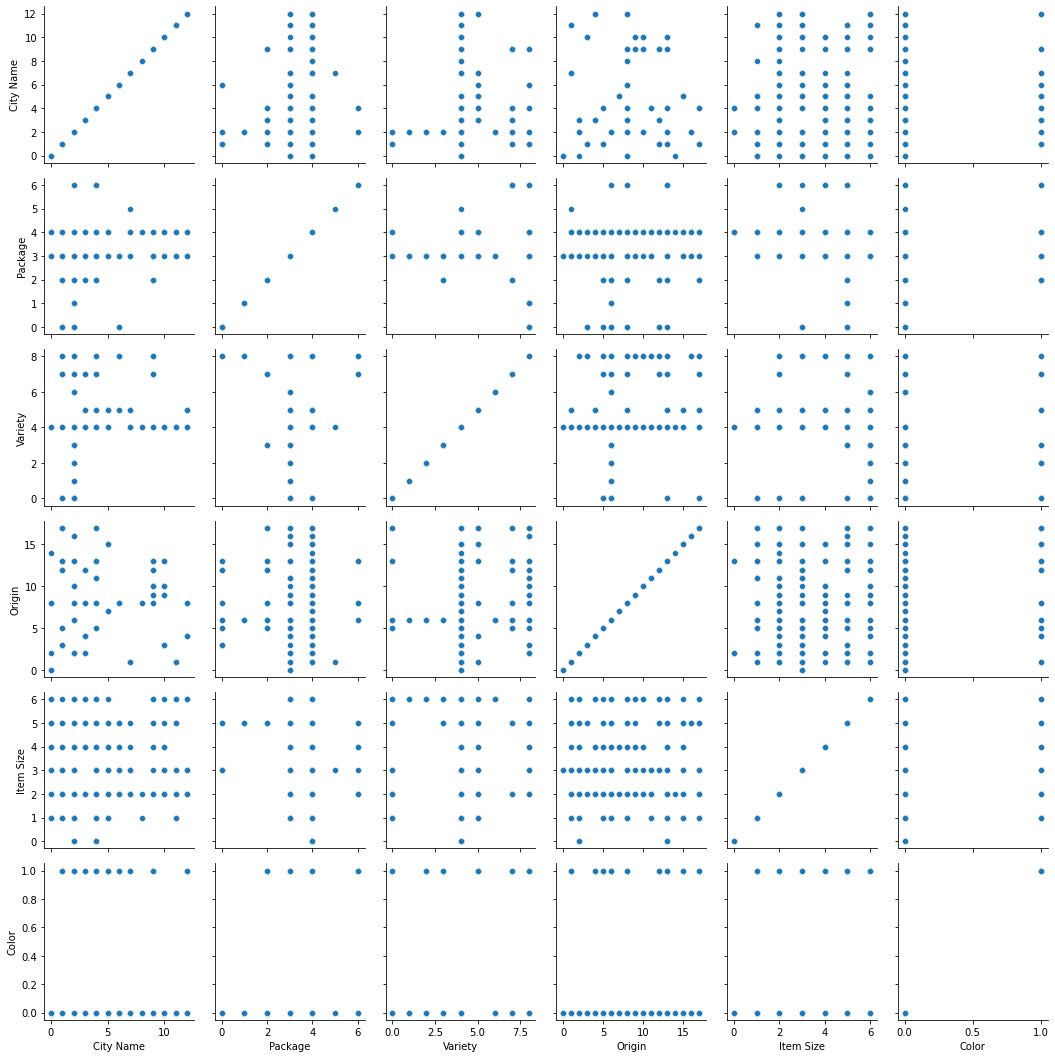

In [7]:
grid = sns.PairGrid(new_pumpkins)
grid.map(sns.scatterplot)

c:\Users\HP\Desktop\ML Course\venv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\Desktop\ML Course\venv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Color', ylabel='Item Size'>

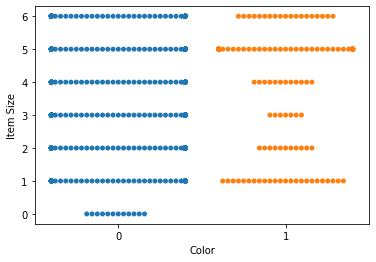

In [8]:
sns.swarmplot(x='Color', y='Item Size', data=new_pumpkins)

<AxesSubplot:xlabel='Color', ylabel='Item Size'>

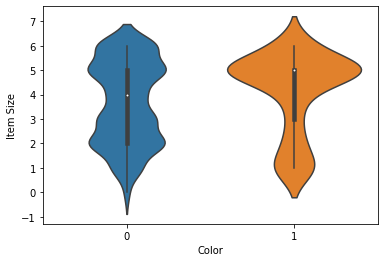

In [9]:
sns.violinplot(x='Color', y= 'Item Size', data= new_pumpkins)

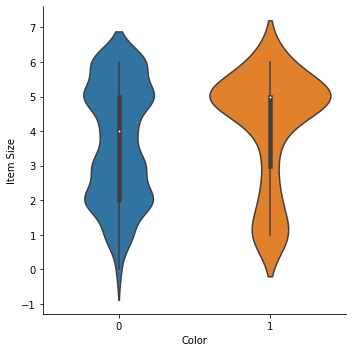

In [10]:
sns.catplot(x='Color', y= 'Item Size', kind='violin' , data= new_pumpkins)

In [12]:
new_columns = ['Origin','Item Size','Variety','City Name','Package']
X = new_pumpkins[new_columns]
y = new_pumpkins['Color']
print(X.shape)
y.shape

(991, 5)


(991,)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Report", classification_report(y_test, predictions))
print('accuracy score', accuracy_score(y_test, predictions))
predictions

Report               precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

accuracy score 0.8140703517587939


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0])

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]], dtype=int64)

c:\Users\HP\Desktop\ML Course\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\HP\Desktop\ML Course\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

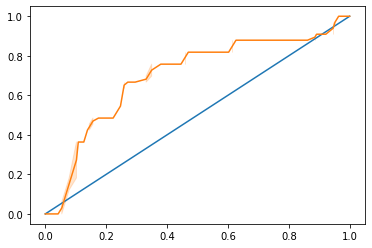

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
sns.lineplot([0, 1],[0, 1])
sns.lineplot(fpr, tpr)

In [22]:
auc = roc_auc_score(y_test, y_scores[:,1])
print(auc)

0.6976998904709748
